# Gathering data


In [151]:
# libraries required for the project
import pandas as pd
import numpy as np
import requests 
from io import BytesIO  # converts bytes to IO files that can be read or written
import tweepy
import json
import csv
import os
% matplotlib inline
import matplotlib.pyplot as plt

In [152]:
# Gather twitter_archive_data
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [153]:
#Sanity check to make sure data is present in the dataframe
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [154]:
df_twitter_archive.shape

(2356, 17)

In [155]:
# Gather image data from the online library
images_url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(images_url)
r=response.content
df_images= pd.read_csv(BytesIO(r), sep="\t")

In [156]:
# sanity check to make sure data is loaded into the the dataframe
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.829456,True,Labrador_retriever,0.089371,True,kuvasz,0.017028,True
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1178,737826014890496000,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,1,vizsla,0.990391,True,Rhodesian_ridgeback,0.005605,True,Chesapeake_Bay_retriever,0.002869,True
850,695767669421768709,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,soft-coated_wheaten_terrier,0.805139,True,Lakeland_terrier,0.121662,True,Afghan_hound,0.023303,True
1010,709409458133323776,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,1,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True


In [157]:
df_images.shape

(2075, 12)

In [158]:
#Tweeter API invocation and Gathering tweet json data (retweet_count, favorite_count)
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api=tweepy.API(auth)
errored_tweet_ids=[]

# write the querying JSON data into tweet_json.txt
with open('tweet_json.txt','a',encoding = 'utf8') as f:
    for each_tweet_id in df_twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(each_tweet_id, tweet_mode = "extended",wait_on_rate_limit="True", wait_on_rate_limit_notify="True" ) # set mode to extended
            json.dump(tweet._json, f)
            f.write("\n")
        except: 
            errored_tweet_ids.append(str(each_tweet_id))
            print('ERROR: Error on tweet id {}'.format(each_tweet_id))
            e = os.sys.exc_info()[0]

In [159]:
#Create a empty list and appeneding each tweet data into it.
tweets_data = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    each_tweet = json.loads(line)
    tweets_data.append(each_tweet)
    
tweet_json.close()

In [160]:
# lets create a dataframe 
df_tweet_data = pd.DataFrame()  

df_tweet_data['id'] = list(map(lambda each_tweet: each_tweet['id'], tweets_data))

df_tweet_data['retweet_count'] = list(map(lambda each_tweet: each_tweet['retweet_count'], tweets_data))

df_tweet_data['favorite_count'] = list(map(lambda eachtweet: each_tweet['favorite_count'], tweets_data))

In [161]:
#Creating dataframe from the csv file created above
df_tweet_data=pd.read_csv("tweet_json.csv")

In [162]:
#sanity check that the data is loaded in the data frame
df_tweet_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8203,37624
1,892177421306343426,6068,32334
2,891815181378084864,4011,24361
3,891689557279858688,8365,40949
4,891327558926688256,9057,39151


In [163]:
df_tweet_data.shape

(2337, 3)

# Assessing Data

> We now have three data frames that need to be assessed, so we can clean them in the next step.

- **df_twitter_archive**
- **df_images**
- **df_tweet_data**

#### 1. Lets assess df_twitter_archive data frame

In [164]:
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> There seems to be 4 dog stage columns which is unneccesary, lets clean them up as part of tidiness issue

In [165]:
df_twitter_archive.shape

(2356, 17)

In [166]:
# checking the data types 
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Lets make a note of what columns that we want to change the data type for. 
I want to change the data types for columns **timestamp.**

In [167]:
# checking if they are any null values in any of the columns that might effect for analysis
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> Okay, the columns that I am intrested seems to be fine. No action is needed here.

In [168]:
# Checking the no of retweets as we want to delete them. Any row that has "retweeted_status_id" has a value is a retweet.
len(df_twitter_archive[df_twitter_archive["retweeted_status_id"].notnull()])

181

> There are 181 rows that are retweets, lets delete them all in our cleaning step.

> Also, lets delete the unneccessary columns "in_reply_to_status_id" , "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id ", "retweeted_status_timestamp" once we delete the retweets.

In [169]:
# checking for duplicate tweet_ids
df_twitter_archive[df_twitter_archive["tweet_id"].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> Good news !!, there are no duplicates. No need to do anything here.

In [170]:
# checking the "name" column.
df_twitter_archive["name"].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Toby           7
Daisy          7
Bailey         7
an             7
Milo           6
Koda           6
Leo            6
Stanley        6
Bella          6
Jack           6
Jax            6
Rusty          6
Dave           6
Oscar          6
Scout          6
very           5
            ... 
Iggy           1
Godzilla       1
Jim            1
Kuyu           1
Ember          1
Gòrdón         1
Skittle        1
Ralphé         1
Amy            1
Vinnie         1
Winifred       1
Pupcasso       1
Jarvis         1
Marvin         1
Cermet         1
Flurpson       1
Kloey          1
Rinna          1
General        1
Robin          1
Randall        1
Batdog         1
Pancake        1
Millie         1
Trevith        1
Kathmandu      1
Cuddles        1
Georgie       

> Looks like are a few dog names that are missing or says "None". And also there are some dog names that are not meaningful. For example - "a", "the", "an". Lets examine these names and see if its a parsing issue.

> Also, there seems to be a mix of upper case and lower case for the dogs, so lets clean them up.

In [171]:
# examine the names with "a", "the", "an", "None". Lets start with None
df_twitter_archive[df_twitter_archive["name"]=="None"].text

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
35      I have a new hero and his name is Howard. 14/1...
37      Here we have a corgi undercover as a malamute....
41      I present to you, Pup in Hat. Pup in Hat is gr...
42      OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...
47      Please only send dogs. We don't rate mechanics...
55      @roushfenway These are good dogs but 17/10 is ...
59      Ugh not again. We only rate dogs. Please don't...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
72      Martha is stunning how h*ckin dare you. 13/10 ...
78      RT @ra

In [172]:
df_twitter_archive[df_twitter_archive["name"]=="a"].text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [173]:
df_twitter_archive[df_twitter_archive["name"]=="the"].text

1527    Stop sending in lobsters. This is the final wa...
1603    This is the newly formed pupper a capella grou...
1797    This is the happiest pupper I've ever seen. 10...
1815    This is the saddest/sweetest/best picture I've...
2037    This is the best thing I've ever seen so sprea...
2212    Never forget this vine. You will not stop watc...
2345    This is the happiest dog you will ever see. Ve...
2346    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [174]:
df_twitter_archive[df_twitter_archive["name"]=="an"].text

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

> Some the issues seems to be parsing issue and some text really do not have a Dog name containg in it. For simplicity sake, let's change the dog names with "a", "an", "the" to "None".

In [175]:
# check different types of source 
df_twitter_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> The source text seems funky, lets change to some thing more intelligble.

In [176]:
# checking the column denominator value_values to see if any values are other than 10
df_twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> Lets delete denominator with value 0

In [177]:
# checking the column numerator value_values to see if any values are other than 10
df_twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

> There seems to be lot of numbers that seem very high. I am going to assume this is fed incorrectly and delete any rows that have **numerator_rating > 20.**

#### 2. Lets assess df_images data frame

In [178]:
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [179]:
df_images.shape

(2075, 12)

In [180]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> Dog breeds in p1, p2, p3 columns seems to have a mix of upper case and lower case lets clean them up


In [181]:
len(df_images.query("p1_dog==False&p2_dog==False&p3_dog==False"))

324

> Seems like there are row where all the three algorithms predicted the image to be not dog. Lets take care of this  in the cleaning step. 

> Also lets melt down the columns p1_conf, p2_conf, p3_conf into one column by choosing the best algorithm  for each row. We will also create new columns "algo" to store the best choosen alogrithm, "algo_conf" to store the confidence of the algorithm choosen, "dog_breed" to store the predicited dog_breed.


#### 2. Lets assess df_tweet_data data frame

In [182]:
df_tweet_data.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8203,37624
1,892177421306343426,6068,32334
2,891815181378084864,4011,24361
3,891689557279858688,8365,40949
4,891327558926688256,9057,39151


In [183]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [184]:
df_tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

> All the the data in df_tweet_data seems to be clean

# Assessing the data - Final notes

**1. Quality issues**

<font color=blue>df_twitter_archive</font>
-  will change the date type of the "timestamp" column.
- "name" column with dog names "a", "an","the" will be replaced by "None."
- ratings_denominator with 0 value will be deleted.
-  "ratings_numerator" have some very high values. Will delete any rows with numerator values greater than 20 as they as absurdly high.
- some dog names are upper case and some are lower case, will clean them up.
- some of the values are missing in "expanded url" column, lets delete these columns.
- will change the source type to be much more human readable.


<font color=blue>df_images</font>
- some dog breeds are in upper case and some are in lower case.
- delete the rows where all three algorithms are prediciting the image not be a dog.

<font color=blue>df_tweet_json</font>
- None.

**2. Tidiness issues**

<font color=blue>df_twitter_archive</font>
- delete the retweets. (I am considering this as tidiness issue as the data is fine, its just redudant)
- remove the different dog stage columns ("doggo", "floofer", "Pupper", Puppo) and just have a new cloumn "dog_stage".
- delete unnecessary columns from df_twitter_archive.
- insert a new column "Rating" which is numerator/denominator.

<font color=blue>df_images</font>
- reduce the alogrithms columns (p1,p2,p3) and algorithms confidence columns(p1_conf, p2_conf, p3_conf) to
have only "algo", "algo_conf"  and best predicted breed "dog_breed".
- delete unnecessary columns.

<font color=blue>df_tweet_data</font>
- None.

<font color=blue>Overall</font>
- merge the three data frames into one master dataframe.



# Cleaning the data

### Lets clean up data quality issues on all the three data frames

In [185]:
# but before we make any changes to the data frames lets make a copy of them
df_twitter_archive_copy = df_twitter_archive.copy()
df_images_copy = df_images.copy()
df_tweet_data_copy= df_tweet_data.copy()

#### df_twitter_archive 

**Define Quality issue 1**

Change the data type of the the column "timestamp"

**Code**

In [186]:
# change the timestamp datatype in df_twitter_archive dataframe.
#before 
print("datatype before is ", df_twitter_archive["timestamp"].dtypes)

#change
df_twitter_archive["timestamp"]=df_twitter_archive.timestamp.astype("datetime64[ns]")



datatype before is  object


**Test**

In [187]:
#After 
print("datatype before is ",df_twitter_archive["timestamp"].dtypes)

datatype before is  datetime64[ns]


**Define Quality issue 2**

Replace dog names in the name column "a", "an","the" will be replaced by "None."

**Code**

In [188]:
# Replace dog names with "a", "an", "the" to "None"
df_twitter_archive["name"].replace("a", "None", inplace=True)
df_twitter_archive["name"].replace("an", "None", inplace=True)
df_twitter_archive["name"].replace("the", "None", inplace=True)

**Test**

In [189]:
#After effect
print ("Number of dogs names with name 'a' is ", len(df_twitter_archive[df_twitter_archive["name"]=="a"]))
print ("Number of dogs names with name 'an' is ", len(df_twitter_archive[df_twitter_archive["name"]=="an"]))
print ("Number of dogs names with name 'the' is ", len(df_twitter_archive[df_twitter_archive["name"]=="the"]))

Number of dogs names with name 'a' is  0
Number of dogs names with name 'an' is  0
Number of dogs names with name 'the' is  0


**Define Quality issue 3**

Delete ratings_denominator with 0 value will be deleted.


**Code**

In [190]:
#deleting row where rating_denominator is 0
df_twitter_archive.drop(df_twitter_archive.index[df_twitter_archive["rating_denominator"] == 0], inplace = True)

**Test**

In [191]:
len(df_twitter_archive[df_twitter_archive["rating_denominator"] == 0])

0

**Define Quality issue 4**

Delete rating_numerator with values > 20.

**Code**

In [192]:
#Delete rows with rating_numerator value x>20
df_twitter_archive.drop(df_twitter_archive.index[df_twitter_archive["rating_numerator"] > 20], inplace = True)

**Test**

In [193]:
#validation
df_twitter_archive["rating_numerator"].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
0       2
15      2
17      1
20      1
Name: rating_numerator, dtype: int64

**Define Quality issue 5**

Change the dog names to all so that every names start with upper case.


**Code**

In [194]:
df_twitter_archive[df_twitter_archive["name"].str.islower()]["name"]

22              such
118            quite
169            quite
193            quite
335              not
369              one
542       incredibly
682              mad
773             very
819             very
822             just
852               my
924              one
988              not
992              his
993              one
1031            very
1040        actually
1063            just
1071         getting
1095             mad
1097            very
1121    unacceptable
1138             all
1206             old
1259     infuriating
1385            very
1435         getting
1457            just
1693        actually
1724              by
1747      officially
1916            life
1936             one
2001           light
2019            just
2030           space
2326           quite
Name: name, dtype: object

In [195]:
df_twitter_archive["name"].str.islower().sum()

38

In [196]:
# lets capitalize them 
df_twitter_archive["name"] = df_twitter_archive.name.str.capitalize()

**Test**

In [197]:
#validate
df_twitter_archive["name"].str.islower().sum()

0

**Define Quality issue 6**

Delete expanded  urls row with missing data.


**Code**

In [198]:
#delete rows with expanded urls with null values
df_twitter_archive.dropna(subset = ['expanded_urls'], inplace=True)

**Test**

In [199]:
#validate
df_twitter_archive.expanded_urls.isnull().sum()

0

**Define Quality issue 7**

Change the "source" text to something that is human readable.

**Code**

In [200]:
df_twitter_archive["source"].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iphone', inplace=True)
df_twitter_archive["source"].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web', inplace=True)
df_twitter_archive["source"].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine', inplace=True)
df_twitter_archive["source"].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

**Test**

In [201]:
df_twitter_archive["source"].value_counts()

iphone         2144
Vine             91
Twitter Web      32
TweetDeck        10
Name: source, dtype: int64

**df_images**

**Define  Quality issue 8**

Delete the rows where all three predicitons (p*_dog) are False

**Code**

In [202]:
#lets delete the rows where all three algorithms are prediciting the image not be a dog
indexNames = df_images[ (df_images["p1_dog"] == False) & (df_images["p2_dog"] == False) & (df_images["p3_dog"] == False) ].index
df_images.drop(indexNames , inplace=True)

**Test**

In [203]:
#validation
df_images.query("p1_dog==False and p2_dog==False and p3_dog==False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Define Quality issue 9**

Change the dog breed columns to be consistent case (some are lower and some are upper)

**Code**

In [204]:
print (df_images["p1"].str.islower().sum())
print (df_images["p2"].str.islower().sum())
print (df_images["p3"].str.islower().sum())

822
794
823


In [205]:
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [206]:
# capitalize the first letter in each word
df_images.p1=df_images.p1.str.capitalize()
df_images.p2=df_images.p2.str.capitalize()
df_images.p3=df_images.p3.str.capitalize()

**Test**

In [207]:
#validate
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 2. Lets clean up Tidiness issues

#### df_twitter_archive

**Define Tidiness issue 1**

Delete retweets

**Code**

In [208]:
# Checking the no of retweets as we want to delete them. Any row that has "retweeted_status_id" has a value is a retweet.
len(df_twitter_archive[df_twitter_archive["retweeted_status_id"].notnull()])

179

In [209]:
#lets delete retweets
indexes=df_twitter_archive[df_twitter_archive["retweeted_status_id"].notnull()].index
df_twitter_archive.drop(indexes , inplace=True)

**Test**

In [210]:
#validation
len(df_twitter_archive[df_twitter_archive["retweeted_status_id"].notnull()])

0

**Define Tidiness issue 2**

Melt dog_stages into one column dog_stage

**Code**

In [211]:
# logic to melt the dog_stages into one column "dog_stage"

# converting all None values to empty string
df_twitter_archive["doggo"]=df_twitter_archive.doggo.replace("None", "")
df_twitter_archive["floofer"]=df_twitter_archive.floofer.replace("None", "")
df_twitter_archive["pupper"]=df_twitter_archive.pupper.replace("None", "")
df_twitter_archive["puppo"]=df_twitter_archive.puppo.replace("None", "")

#concatenating all the strings and storing them in dog_stage column
df_twitter_archive["dog_stage"]=df_twitter_archive.doggo.str.cat(df_twitter_archive.floofer).str.cat(df_twitter_archive.pupper).str.cat(df_twitter_archive.puppo)

#dropping the columns doggo, floofer,pupper, puppo
df_twitter_archive.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

#Replacing the empty strings to null values
df_twitter_archive.dog_stage.replace("", "None", inplace=True)

**Test**

In [212]:
# check the counts of dog_stage
df_twitter_archive["dog_stage"].value_counts()

None            1761
pupper           221
doggo             72
puppo             23
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

Okay, there seems to be about 11 rows that are have two tagged by multiple stages. Eg. doggopupper, doggopuppo, doggofloofer. Lets fix them and assign them "doggo" stage. 

**Code again**

In [213]:
# replace the dogstages : "doggopupper", "doggopuppo", "dogoofloofer" to "doggo"
df_twitter_archive["dog_stage"]=df_twitter_archive.dog_stage.replace("doggopupper", "doggo")
df_twitter_archive["dog_stage"]=df_twitter_archive.dog_stage.replace("doggopuppo", "doggo")
df_twitter_archive["dog_stage"]=df_twitter_archive.dog_stage.replace("doggofloofer", "doggo")

**Test again**

In [214]:
# validate
df_twitter_archive["dog_stage"].value_counts()

None       1761
pupper      221
doggo        84
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [215]:
# validate that whole dataframe to check the latest modicfications
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57,iphone,Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,Dayz,None
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29,iphone,This is Lilly. She just parallel barked. Kindl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34,iphone,This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43,iphone,This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12,iphone,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None


**Define Tidiness issue 3**

Insert a new column Rating

**Code**

In [216]:
#insert a new colum "Rating" which is the divison of numerator/denominator
df_twitter_archive.insert(9, "Rating", (df_twitter_archive["rating_numerator"]/df_twitter_archive["rating_denominator"]))

**Test**

In [217]:
#validate the change that new column is added
df_twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,Rating,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,1.3,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


**Define Tidiness issue 4**

Delete unnecessary columns

**Code**

In [218]:
#delete unneccesary columns 
columns = ["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id",
          "retweeted_status_timestamp", "rating_denominator", "rating_numerator"]
df_twitter_archive = df_twitter_archive.drop(columns, axis=1)

**Test**

In [219]:
df_twitter_archive.head(1)

,tweet_id,timestamp,source,text,Rating,expanded_urls,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,iphone,This is Phineas. He's a mystical boy. Only eve...,1.3,https://twitter.com/dog_rates/status/892420643...,Phineas,None


#### df_images

**Define Tidiness issue 5**

Check which predicition is the best prediciton and reduce the algorithm/prediction colums to  "alog" , "algo_conf", "`dog_breed"

**Code**

In [220]:
# lets check the condition : if p1_conf > p2_conf > p3_conf is always true.
p1=p2=p3=0 # to store the count of each alogirthms

#looping through index and comparing the P1_conf values
for index in df_images.index:
    if df_images.loc[index]["p1_conf"]< df_images.loc[index]["p2_conf"]:
        if df_images.loc[index]["p2_conf"]< df_images.loc[index]["p3_conf"]:
            p3=p3+1
        else:
            p2=p2+1
    else:
        p1=p1+1
print(p1, p2, p3)



1751 0 0


In [221]:
#lets check if the condition p2_conf > p3_conf is always true or not
p2=p3=0
for index in df_images.index:
    if df_images.loc[index]["p2_conf"]< df_images.loc[index]["p3_conf"]:
        p3=p3+1
    else:
        p2=p2+1
print (p2, p3)

1751 0


> **Looks like p1_conf > p2_conf > p3_conf is always true. I am going to choose the highest confidence algorithm. If the the highest confidence alogrithm has p*_dog as false,  I will choose the next highest confidence and so on so forth.**

In [222]:
# logic to find the best possible prediction. 
# as we already from above that p1_conf > p2_conf > p3_conf, we wil check for their p*_dog values and decide the best
# predicitonalgorithm.

#looping through each row
for index in df_images.index:
    
    #checking if p1_dog is false or not, if yes it wil choose the next best algorithm p2 given p2_dog is true, else it 
    #will check for p3_dog value.
    
    if not df_images.loc[index]["p1_dog"]:
        if not df_images.loc[index]["p2_dog"]:
            if not df_images.loc[index]["p3_dog"]:
                df_images.at[index,"dog_breed"] =np.nan
                df_images.at[index,"algo"] = np.nan
                df_images.at[index,"algo_conf"] = np.nan
            else:
                df_images.at[index,"dog_breed"] = df_images.loc[index]["p3"]
                df_images.at[index,"algo"] = "p3"
                df_images.at[index,"algo_conf"] = df_images.loc[index]["p3_conf"] 
        else:
            df_images.at[index,"dog_breed"] = df_images.loc[index]["p2"]
            df_images.at[index,"algo"] = "p2"
            df_images.at[index,"algo_conf"] = df_images.loc[index]["p2_conf"]       
    else:
        df_images.at[index,"dog_breed"] = df_images.loc[index]["p1"]
        df_images.at[index,"algo"] = "p1"
        df_images.at[index,"algo_conf"] = df_images.loc[index]["p1_conf"]
        

**Test**

In [223]:
#verify the new columns are added 
df_images.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,algo,algo_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,p1,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,p1,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German_shepherd,p1,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,Rhodesian_ridgeback,p1,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature_pinscher,p1,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True,Bernese_mountain_dog,p1,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False,Chow,p1,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True,Golden_retriever,p3,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True,Miniature_poodle,p1,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,Golden_retriever,p1,0.775930


**Define Tidiness issue 6**

Delete unnecessary columns

**Code**

In [224]:
# lets inspect and delete unnecessary columns from the df_image
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 15 columns):
tweet_id     1751 non-null int64
jpg_url      1751 non-null object
img_num      1751 non-null int64
p1           1751 non-null object
p1_conf      1751 non-null float64
p1_dog       1751 non-null bool
p2           1751 non-null object
p2_conf      1751 non-null float64
p2_dog       1751 non-null bool
p3           1751 non-null object
p3_conf      1751 non-null float64
p3_dog       1751 non-null bool
dog_breed    1751 non-null object
algo         1751 non-null object
algo_conf    1751 non-null float64
dtypes: bool(3), float64(4), int64(2), object(6)
memory usage: 263.0+ KB


In [225]:
# Lets delete unneccessary : img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog p3, p3_conf, p3_dog
columns = ["img_num", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"]
df_images.drop(columns, axis=1, inplace=True)

**Test**

In [226]:
df_images.head(1)

,tweet_id,jpg_url,dog_breed,algo,algo_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,p1,0.465074


**Define Tidiness 7**

Merge all three dataframes

**Code**

In [227]:
#merge all three dataframes : first merge df_twitter_archive and df_images dataframe
df_master_twitter_data=pd.merge(df_twitter_archive, df_images, on="tweet_id")

In [228]:
#merge master dataframe and df_tweet_data
df_master_twitter_data=pd.merge(df_master_twitter_data, df_tweet_data, on="tweet_id")

**Test**

In [229]:
df_master_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 14 columns):
tweet_id          1666 non-null int64
timestamp         1666 non-null datetime64[ns]
source            1666 non-null object
text              1666 non-null object
Rating            1666 non-null float64
expanded_urls     1666 non-null object
name              1666 non-null object
dog_stage         1666 non-null object
jpg_url           1666 non-null object
dog_breed         1666 non-null object
algo              1666 non-null object
algo_conf         1666 non-null float64
retweet_count     1666 non-null int64
favorite_count    1666 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 195.2+ KB


In [230]:
df_master_twitter_data.sample(5)

,tweet_id,timestamp,source,text,Rating,expanded_urls,name,dog_stage,jpg_url,dog_breed,algo,algo_conf,retweet_count,favorite_count
1636,666437273139982337,2015-11-17 02:06:42,iphone,Here we see a lone northeastern Cumberbatch. H...,0.7,https://twitter.com/dog_rates/status/666437273...,None,None,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,Chihuahua,p1,0.671853,47,122
35,883838122936631299,2017-07-09 00:00:04,iphone,This is Noah. He can't believe someone made th...,1.2,https://twitter.com/dog_rates/status/883838122...,Noah,None,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,Doberman,p1,0.610946,3333,21297
257,826958653328592898,2017-02-02 01:01:21,iphone,This is Loki. He smiles like Elvis. Ain't noth...,1.2,https://twitter.com/dog_rates/status/826958653...,Loki,doggo,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,Golden_retriever,p1,0.617389,5363,22590
1259,676819651066732545,2015-12-15 17:42:34,iphone,Watch out Airbud. This pupper is also good at ...,1.2,https://twitter.com/dog_rates/status/676819651...,None,pupper,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,Labrador_retriever,p3,0.039465,694,1851
1363,673705679337693185,2015-12-07 03:28:45,iphone,This is Dot. He found out you only pretended t...,0.8,https://twitter.com/dog_rates/status/673705679...,Dot,None,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,Shih-tzu,p1,0.165383,410,1266


In [231]:
# Lets store the master dataframe into a csv file
df_master_twitter_data.to_csv('twitter_archive_master.csv', index=False)

# Analysis


1. Which dog breed has the highest number of tweets.
2. Which dog breed has the highest number of retweet counts.
3. Which dog breed has the highest number of tweet favorites.
4. Which tweet/dog
  -  has the highest rating.
  
  - has the maximum number of tweet counts.
  
  -  has the maximum number of tweet favorites.
  
3. What is the reteweet count vs rating relationship.
4. What is the tweet favorite count vs rating relationship.
5. What is the most common source.
6. Which dog stage is most prevalent.
7. Which dog stage has highest rating.


#### Queston 1 
> **Which dog breed has the highest number of tweets.**

In [232]:
dog_breed_count=df_master_twitter_data["dog_breed"].value_counts()
dog_breed_count[0:5]

Golden_retriever      155
Labrador_retriever    103
Pembroke               95
Chihuahua              91
Pug                    62
Name: dog_breed, dtype: int64

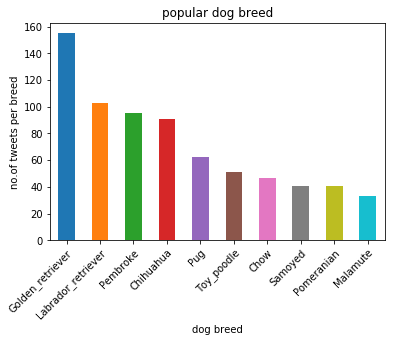

In [233]:

dog_breed_count[0:10].plot(kind="bar", figsize=(6, 4))
plt.title("popular dog breed")
plt.xlabel("dog breed")
plt.xticks(rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.ylabel("no.of tweets per breed")
plt.show()

> **"Golden Retiever" seems to be the dog breed that has most number of tweets.**

#### Question 2
> **Which dog breed has the highest number of retweet counts.**

In [234]:
top_retweet_count=df_master_twitter_data.groupby("dog_breed").sum().sort_values(by ="retweet_count" , ascending = False ).loc[:,"retweet_count"][0:10]
top_retweet_count

dog_breed
Golden_retriever      551134.0
Labrador_retriever    365193.0
Pembroke              274453.0
Chihuahua             245805.0
Samoyed               181108.0
French_bulldog        152973.0
Cocker_spaniel        138187.0
Chow                  123607.0
Pug                   110165.0
Toy_poodle            107972.0
Name: retweet_count, dtype: float64

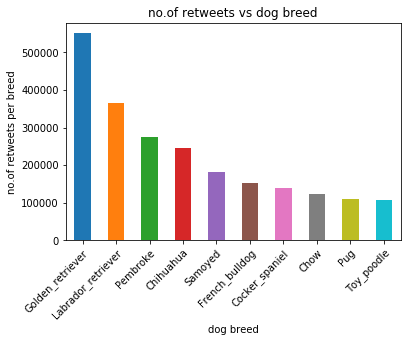

In [235]:
top_retweet_count.plot(kind="bar", figsize=(6, 4))
plt.title("no.of retweets vs dog breed")
plt.xlabel("dog breed")
plt.xticks(rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.ylabel("no.of retweets per breed")
plt.show()

> **Golden Retriever seems to have the most number of re_tweets**.

#### Question 3
> **Which dog breed has the highest number of tweet favorites.**

In [236]:
top_tweetfav_count=df_master_twitter_data.groupby("dog_breed").sum().sort_values(by ="favorite_count" , ascending = False ).loc[:,"favorite_count"][0:10]
top_tweetfav_count

dog_breed
Golden_retriever      1866708.0
Labrador_retriever    1162966.0
Pembroke              1006754.0
Chihuahua              749013.0
French_bulldog         583272.0
Samoyed                536904.0
Chow                   431641.0
Cocker_spaniel         394042.0
Pug                    363927.0
Malamute               340134.0
Name: favorite_count, dtype: float64

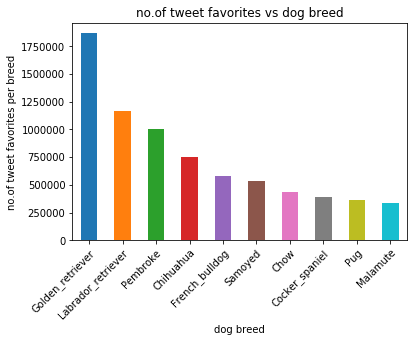

In [237]:
top_tweetfav_count.plot(kind="bar", figsize=(6, 4))
plt.title("no.of tweet favorites vs dog breed")
plt.xlabel("dog breed")
plt.xticks(rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.ylabel("no.of tweet favorites per breed")
plt.show()

> **Golden Retriever seems to have the most number of tweet favorites.**

#### Question 4 
**Which tweet/dog has the highest rating**

**Which tweet/dog has the highest retweet_count**

**which tweet/dog has the highest favorite_count**

In [238]:
# highest rating
df_master_twitter_data.loc[df_master_twitter_data["Rating"].idxmax()]

tweet_id                                         890240255349198849
timestamp                                       2017-07-26 15:59:51
source                                                       iphone
text              This is Cassie. She is a college pup. Studying...
Rating                                                          1.4
expanded_urls     https://twitter.com/dog_rates/status/890240255...
name                                                         Cassie
dog_stage                                                     doggo
jpg_url             https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
dog_breed                                                  Pembroke
algo                                                             p1
algo_conf                                                  0.511319
retweet_count                                                  7125
favorite_count                                                31025
Name: 8, dtype: object

> **tweetID 890240255349198849, dog name Cassie, seems to have the maximum rating.**

> **Lets get picture of the this awesome dog who has the highest rating based on the data.**

![title](https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg)

In [239]:
# Highest retweet_count
df_master_twitter_data.loc[df_master_twitter_data["retweet_count"].idxmax()]

tweet_id                                         744234799360020481
timestamp                                       2016-06-18 18:26:18
source                                                       iphone
text              Here's a doggo realizing you can stand in a po...
Rating                                                          1.3
expanded_urls     https://twitter.com/dog_rates/status/744234799...
name                                                           None
dog_stage                                                     doggo
jpg_url           https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                        Labrador_retriever
algo                                                             p1
algo_conf                                                  0.825333
retweet_count                                                 82658
favorite_count                                               162519
Name: 683, dtype: object

> **tweet id 744234799360020481, a labrador_retriever seems to have the highest re_tweet count, unfortunately his name data is not available, I am going to call him "Hydro", as he seems to enjoy water a lot.**

> **Lets get picture of the this awesome dog who has the highest re_tweet count in our data.**

![title](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

In [240]:
# Highest favorites_count
df_master_twitter_data.loc[df_master_twitter_data["favorite_count"].idxmax()]

tweet_id                                         744234799360020481
timestamp                                       2016-06-18 18:26:18
source                                                       iphone
text              Here's a doggo realizing you can stand in a po...
Rating                                                          1.3
expanded_urls     https://twitter.com/dog_rates/status/744234799...
name                                                           None
dog_stage                                                     doggo
jpg_url           https://pbs.twimg.com/ext_tw_video_thumb/74423...
dog_breed                                        Labrador_retriever
algo                                                             p1
algo_conf                                                  0.825333
retweet_count                                                 82658
favorite_count                                               162519
Name: 683, dtype: object

> **Wow, its the same labrador retriever dog (from above) with highest favorite_count.**

#### Question 5

**What is the reteweet count vs rating relationship**

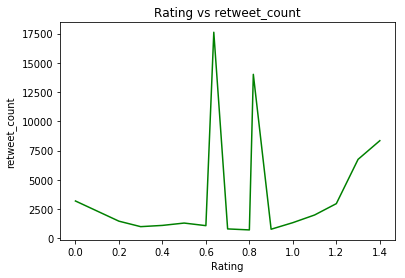

In [241]:
#taking the mean of retweet count for each rating
rate_retweet=df_master_twitter_data.groupby("Rating")['retweet_count'].mean()
rate_retweet.plot(x="Rating", y="retweet_count", kind="line", figsize=(6,4), color="green")
plt.title("Rating vs retweet_count")
plt.xlabel("Rating")
plt.ylabel("retweet_count")
plt.show()

> **It seems odd that Rating with less than 1 have higher retweet_count at ome peaks, seems to be a parsing issue with wrong rating captured or maybe people maybe like to retweet about non-dog things which have less rating.** 

> **As a general trend starting from rating 1.0, the retweet_count seems to grow as the ratings gets higher.**

#### Question 6

**What is the favorite count vs Rating relationship**

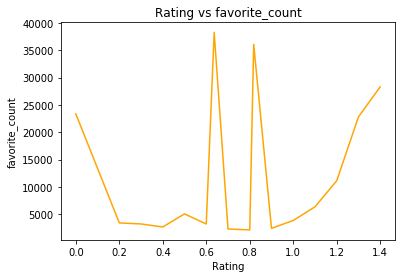

In [242]:
# taking the mean of favorite_count for each rating
rate_fav=df_master_twitter_data.groupby("Rating")['favorite_count'].mean()
rate_fav.plot(x="Rating", y="favorite_count", kind="line", figsize=(6,4), color="orange")
plt.title("Rating vs favorite_count")
plt.xlabel("Rating")
plt.ylabel("favorite_count")
plt.show()

> **It seems odd that Rating with less than 1.0 have higher favorite_count, seems to be a parsing issue with wrong rating captured or maybe people maybe like to favorite  non-dog things which have less rating.** 

> **As a general trend, starting from rating 1.0 the favorite_count seems to grow as the ratings gets higher.**

#### Question 7

**What is the most common source.**

In [243]:
df_master_twitter_data["source"].value_counts()

iphone         1636
Twitter Web      22
TweetDeck         8
Name: source, dtype: int64

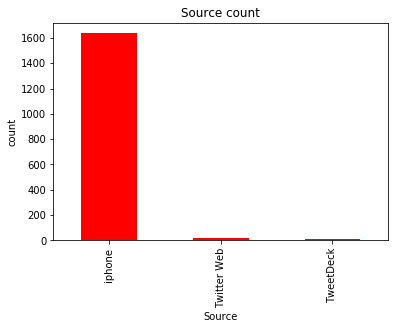

In [244]:
df_master_twitter_data["source"].value_counts().plot(kind="bar", figsize=(6,4), color="red")
plt.title("Source count")
plt.xlabel("Source")
plt.ylabel("count")
#plt.xticks(rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.show()

> **iphone seems to be the most common source.**

#### Question 8

**Which dog stage is most prevalent.**

In [245]:
df_master_twitter_data["dog_stage"].value_counts()

None       1407
pupper      167
doggo        64
puppo        21
floofer       7
Name: dog_stage, dtype: int64

> **Pupper dog_stage seems to be most popular. That tells, people like to send in their puppy pictures more often.**

#### Question 9
**Which dog stage is most prevalent.**

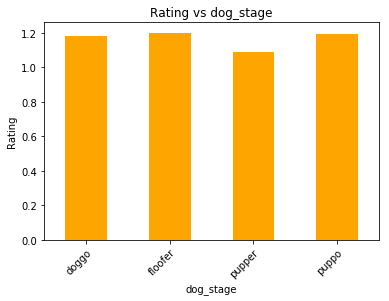

dog_stage
doggo      1.182812
floofer    1.200000
pupper     1.086228
puppo      1.195238
Name: Rating, dtype: float64

In [246]:
rate_dogstage=df_master_twitter_data.groupby("dog_stage")['Rating'].mean()

rate_dogstage[1:5].plot(x="dog_stage", y="Rating", kind="bar", figsize=(6,4), color="orange")
plt.title("Rating vs dog_stage")
plt.xlabel("dog_stage")
plt.ylabel("Rating")
plt.xticks(rotation=45, rotation_mode="anchor", horizontalalignment="right")
plt.show()
rate_dogstage[1:5]

> **Floofer dog_stage seems to have highest rating overall.**